## import dataset for train model

In [1]:
import sys
import pandas as pd 
sys.path.insert(0, '../../src')

In [2]:
from data.make_dataset import load_sets
X_train, y_train, X_val, y_val, X_test, y_test = load_sets(path='../../data/processed/')

## Get Baseline Model

In [3]:
from models.null import NullRegressor
base_model = NullRegressor()
y_base = base_model.fit_predict(y_train)
from models.predict_model import print_regressor_scores
print_regressor_scores(y_preds=y_base, y_actuals=y_train, set_name='Training')

MSE Training: 1.0008648851928268
MAE Training: 0.7466010716968183
R2_score Training: 0.0


## Modelling
Starting with regression approaches, we will use the following models:

1. Decision Tree Regression
2. XGBoost Regression (default)
3. XGBoost Regression (Gridsearch)
4. Random Forest Regressor

## DecisionTree

## Decision Tree Regression
Decision Tree Regression is a non-linear regression algorithm that models data as a tree-like structure of decisions and outcomes. It partitions the feature space into regions and assigns a constant value to each region, making it suitable for capturing complex relationships in the data.

### Why Decision Tree Regression for fare precition?

1. **Non-linearity:**  Decision trees can capture non-linear relationships between input features and the target variable. In the case of fare prediction, factors influencing the fare may not follow a simple linear pattern, and decision trees can model complex relationships.
2. **Interpretability:** Decision trees are inherently interpretable, allowing you to visualize and understand how the model makes predictions. This can be beneficial for stakeholders who require transparency.
3. **Handling Categorical Data:** Decision trees can handle both categorical and numerical data, making them versatile for various fare prediction tasks.
In the following sections, we will build a Decision Tree Regression model using the selected features to predict total fare. We will analyze the tree structure and assess its performance on the dataset.

In [18]:
# Decsion Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [19]:
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)

# Model evaluation for training set
y_train_preds_tree = tree.predict(X_train)

# Model evaluation for val set
y_val_preds_tree = tree.predict(X_val)
print_regressor_scores(y_preds=y_train_preds_tree, y_actuals=y_train, set_name='Training')

MSE Training: 0.5146222341659272
MAE Training: 0.5156166134098724
R2_score Training: 0.485822


The training data's MSE is around 0.514. This means that the model's predictions have an average inaccuracy of 0.514 units on the same scale as target variable. Because a lower MSE indicates superior model performance, a lower number is prefered.

The MAE on the training data is approximately 0.515. This means that, on average, the model's predictions have an absolute error of about 0.515 units

In [20]:
print_regressor_scores(y_preds=y_val_preds_tree, y_actuals=y_val, set_name='Validation')

MSE Validation: 0.5137273705151021
MAE Validation: 0.5154562182257725
R2_score Validation: 0.484277


The validation data's MSE is around 0.513. This means that the model's predictions have an average inaccuracy of 0.513 units on the same scale as target variable. Because a lower MSE indicates superior model performance, a lower number is prefered.

the MAE on the validation data is approximately 0.515. This means that, on average, the model's predictions have an absolute error of about 0.515 units

In [8]:
from joblib import dump
dump(tree,  '../../src/models/regression/decision_tree.joblib')

['../../src/models/regression/decision_tree.joblib']

## XGBoost Regression

XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm known for its exceptional predictive accuracy and ability to handle complex datasets. It is a gradient boosting algorithm that combines multiple decision trees to make robust predictions. XGBoost has gained popularity in various fields due to its efficiency and effectiveness.

### Why XGBoost for fare Prediction?

When it comes to predicting total fare, XGBoost offers several advantages:

1. **High Predictive Accuracy:** XGBoost excels in capturing intricate patterns and relationships within the data, making it highly accurate in fare prediction. It can handle both linear and nonlinear dependencies effectively.

2. **Reduced Overfitting:** XGBoost incorporates techniques like regularization and early stopping, which help prevent overfitting. This ensures that the model generalizes well to unseen data, crucial for fare forecasting.

3. **Feature Importance:** XGBoost provides feature importance scores, allowing us to understand which factors (features) have the most significant impact on fare. This insight can be valuable for decision-making and business strategy.

4. **Flexibility:** XGBoost can handle a wide range of data types, including numeric and categorical features, making it suitable for diverse fare prediction scenarios.

In the following sections, we will build an XGBoost regression model using selected features to predict total fare accurately. We will explore the model's performance and feature importance to gain insights into the factors influencing fare.

In [4]:
from xgboost import XGBRegressor

In [5]:
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

# Model evaluation for training set
y_train_preds_xgb = xgb.predict(X_train)

# Model evaluation for validation set
y_val_preds_xgb = xgb.predict(X_val)

In [6]:
print_regressor_scores(y_preds=y_train_preds_xgb, y_actuals=y_train, set_name='Training')

MSE Training: 0.29920753456839483
MAE Training: 0.36894027772669424
R2_score Training: 0.701051


In [7]:
print_regressor_scores(y_preds=y_val_preds_xgb, y_actuals=y_val, set_name='Validation')

MSE Validation: 0.29927310235002746
MAE Validation: 0.3690800871186597
R2_score Validation: 0.699564


## Best Model

In [15]:
# Model evaluation for validation set
y_test_preds_xgb = xgb.predict(X_test)

In [16]:
print_regressor_scores(y_preds=y_test_preds_xgb, y_actuals=y_test, set_name='Validation')

MSE Validation: 0.2990440912696
MAE Validation: 0.3692362936707789
R2_score Validation: 0.701337


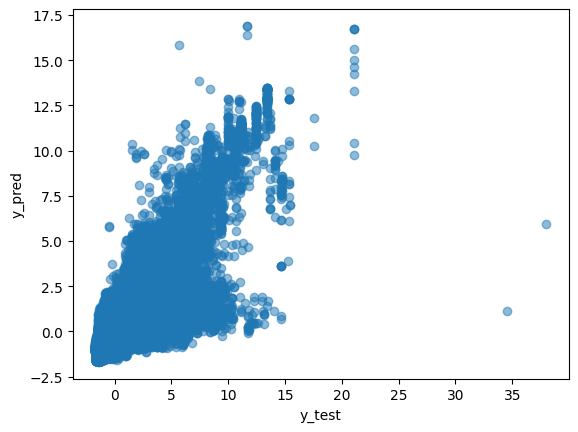

In [14]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test_preds_xgb, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [8]:
from joblib import dump

In [9]:
dump(xgb,  '../../src/models/regression/xgb_default.joblib')

['../../src/models/regression/xgb_default.joblib']

## GridSearch

These hyperparameters were chosen based on common practices and considerations for XGBoost regression models

- n_estimators: [100, 200, 300] - The number of boosting rounds or trees in the ensemble.
- max_depth: [3, 4, 5] - The maximum depth of the individual trees.
- learning_rate: [0.1, 0.2, 0.01] - The learning rate, which controls the step size during optimization.

In [11]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 4, 5],          # Maximum depth of trees
    'learning_rate': [0.1, 0.2, 0.01]  # Learning rate
}

# Create a GridSearchCV object with the XGBoost model and parameter grid
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)

# Fit the GridSearchCV object
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding RMSE score
best_params = grid_search.best_params_
best_rmse = (-grid_search.best_score_) ** 0.5

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

The above command took 134 minutes to complete
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}

Best RMSE: 0.548

## Best Params

In [12]:
import xgboost as xgb

# Create an XGBoost regressor with the best hyperparameters
bestparam_xgb_model = xgb.XGBRegressor(
    n_estimators=300,     # Best number of boosting rounds
    max_depth=5,          # Best maximum depth of trees
    learning_rate=0.2     # Best learning rate
)

# Fit the model to your training data
bestparam_xgb_model.fit(X_train, y_train)

# Model evaluation for training set
y_train_preds_xgb01 = bestparam_xgb_model.predict(X_train)

# Model evaluation for validation set
y_val_preds_xgb01 = bestparam_xgb_model.predict(X_val)

In [13]:
print_regressor_scores(y_preds=y_train_preds_xgb01, y_actuals=y_train, set_name='Training')

MSE Training: 0.29885749434138903
MAE Training: 0.3682763706048124
R2_score Training: 0.701401


In [14]:
print_regressor_scores(y_preds=y_val_preds_xgb01, y_actuals=y_val, set_name='Validation')

MSE Validation: 0.298779540698141
MAE Validation: 0.3683612124191689
R2_score Validation: 0.70006


In [16]:
## Best Model is XGBoost with best parameters
# Model evaluation for test set
y_test_preds_xgb01 = bestparam_xgb_model.predict(X_test)

In [17]:
print_regressor_scores(y_preds=y_test_preds_xgb01, y_actuals=y_test, set_name='test')

MSE test: 0.29856705568664355
MAE test: 0.36856696526940136
R2_score test: 0.701813


In [21]:
dump(bestparam_xgb_model,  '../../models/xgb_bestparam.joblib')

['../../models/xgb_bestparam.joblib']